In [125]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

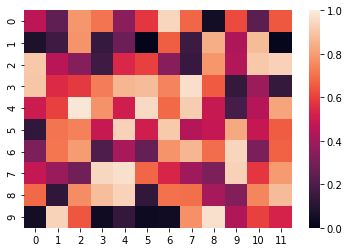

In [5]:
# Tutorials of Seaborn heatmap generation.
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, vmin = 0, vmax = 1)

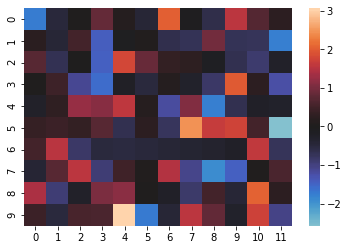

In [6]:
# Note the one extra letter in the numpy function name.  This generates random values according to a normal distribution.  This 
# is likely a useful color scheme for plotting oak hybrid viability, but even this spectrum may be more than needed, based on
# what data type we pick.
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center = 0)

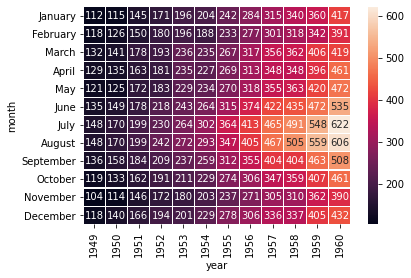

In [3]:
# Pivot tables are a pandas tool, which takes columns from a tableb and groups entries into a 2D table (such as a heatmap).
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d", linewidths = 0.15)

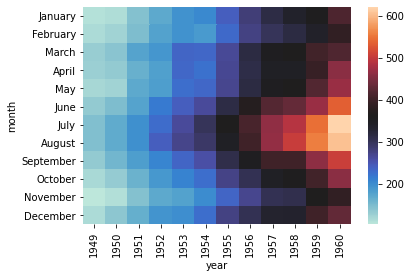

In [8]:
# Center the color mapping around a specified value.
ax = sns.heatmap(flights, center=flights.loc["July", 1955])

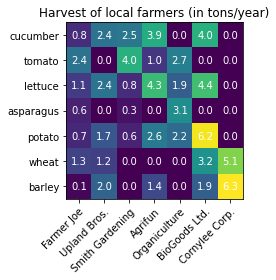

In [9]:
# Matplotlib heatmap example.  The following command overlays Seaborn graphical style on top of the code from another package.
# sns.set()

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

Heatmap of binary oak hybrid data
========

In [6]:
# Import and view the oak hybrid table, originally from the google spreadsheet.
df = pd.read_csv("../oak-hybrid-table.csv")
df

,speciesA,speciesB
0,Quercus alba,Quercus bicolor
1,Quercus alba,Quercus macrocrapa
2,Quercus alba,Quercus montana
3,Quercus alba,Quercus muhlenbergii
4,Quercus alba,Quercus prinoides
...,...,...
229,Quercus chrysolepis,Quercus tomentella
230,Quercus branttii,Quercus macrolepis
231,Quercus ithaburensis,Quercus libani
232,Quercus libani,Quercus trojana


In [51]:
# Import the Hipp dataset, apply tip mask, filter for binomail names, and extract them to a list.
ds = pd.read_csv("../Hipp-2019-table-S1.csv")
mask = ds.singleTip == 1
ds_data = ds.loc[mask, ["Cleaned_NAMES-USE-THIS", "SRA_Run_Accession_RADseq"]]

accessions = []
for index, row in ds_data.iterrows(): 
    accession = row["Cleaned_NAMES-USE-THIS"]
    accessions.append(accession)    
accessions_clean = [x for x in accessions if str(x) != "nan"]
accessions_clean_alpha = accessions_clean.sort()
accessions_clean

['Castanea dentata',
 'Castanopsis fissa',
 'Chrysolepis chrysophylla',
 'Lithocarpus hancei',
 'Lithocarpus litseifolius',
 'Lithocarpus longinux',
 'Lithocarpus mairei',
 'Notholithocarpus densiflorus',
 'Quercus acerifolia',
 'Quercus acrodonta',
 'Quercus acuta',
 'Quercus acutifolia',
 'Quercus acutissima',
 'Quercus afares',
 'Quercus affinis',
 'Quercus agrifolia',
 'Quercus agrifolia var. oxyadenia',
 'Quercus ajoensis',
 'Quercus alba',
 'Quercus aliena',
 'Quercus alnifolia',
 'Quercus annulata',
 'Quercus arbutifolia',
 'Quercus aristata',
 'Quercus arizonica',
 'Quercus arizonica',
 'Quercus arkansana',
 'Quercus aucheri',
 'Quercus augustini',
 'Quercus austrina',
 'Quercus austrocochinchinensis',
 'Quercus baloot',
 'Quercus baronii',
 'Quercus bella',
 'Quercus benthamii',
 'Quercus berberidifolia',
 'Quercus bicolor',
 'Quercus blakei',
 'Quercus boissieri',
 'Quercus boyntonii',
 'Quercus brachystachys',
 'Quercus brandegeei',
 'Quercus brantii',
 'Quercus buckleyi',
 

In [52]:
# Create a 261x261 matrix with the accessions list as columns and index, and fill the matrix with zeroes.
dl = pd.DataFrame(np.zeros((261, 261)), columns = accessions_clean, index = accessions_clean)
dl

,Castanea dentata,Castanopsis fissa,Chrysolepis chrysophylla,Lithocarpus hancei,Lithocarpus litseifolius,Lithocarpus longinux,Lithocarpus mairei,Notholithocarpus densiflorus,Quercus acerifolia,Quercus acrodonta,...,Quercus vacciniifolia,Quercus variabilis,Quercus vaseyana,Quercus velutina,Quercus viminea,Quercus virginiana,Quercus vulcanica,Quercus wislizeni,Quercus yiwuensis,Quercus yunnanensis
Castanea dentata,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Castanopsis fissa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chrysolepis chrysophylla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lithocarpus hancei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lithocarpus litseifolius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quercus virginiana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Quercus vulcanica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Quercus wislizeni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Quercus yiwuensis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# Extract the hybrid pairs into a list object containing strings.
hybrid_pairs = []
for i in range(len(df)):
    combine = df["speciesA"][i] + " " + df["speciesB"][i]
    hybrid_pairs.append(combine)

# For each column/index combo in the matrix, create a string and check if it matches with anything in hybrid pairs list.  If it
# does, change the corresponding matrix value to 1.  Also, if the column and index match each other (that is, comparing a
# species to itself), change that value as well.
for i in dl.columns:
    for j in dl.index:
        combine = i + " " + j
        if combine in hybrid_pairs:
            dl.loc[i, j] = 1
        if i == j:
            dl.loc[i, j] = 1

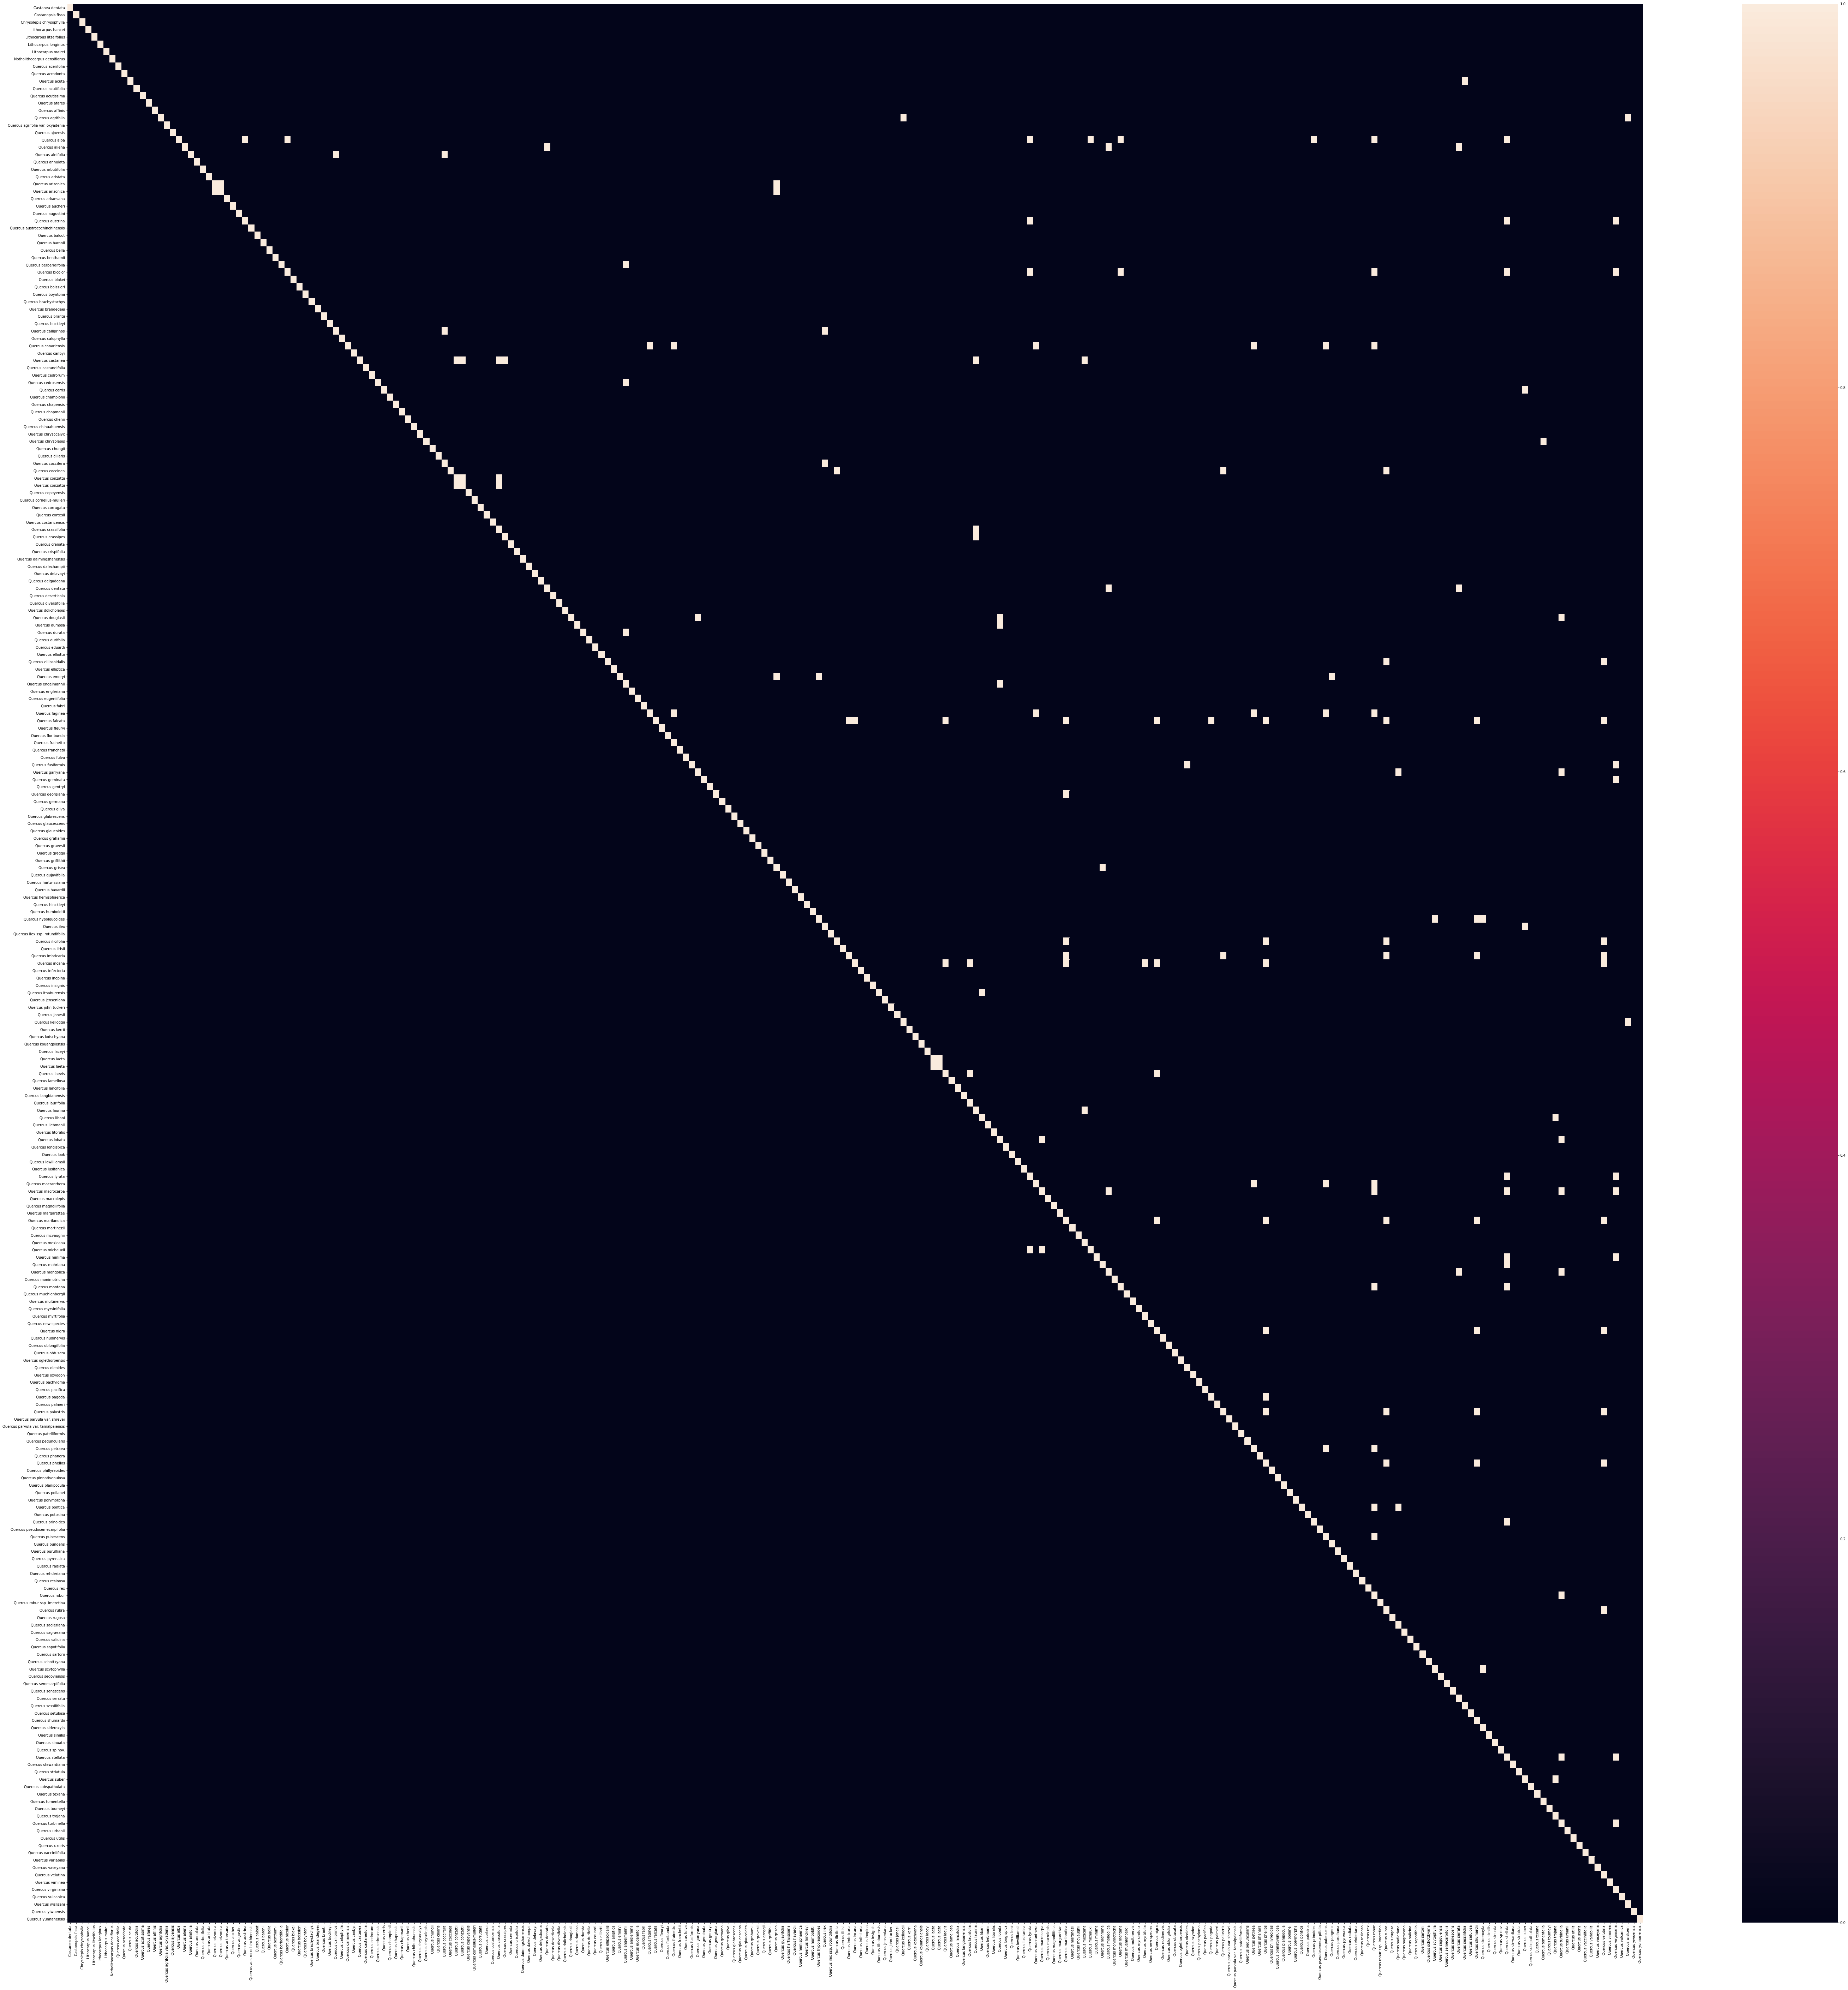

In [124]:
# For now the columns and index are in alphabetical name order, but what order would work better? 
plt.figure(figsize = (100, 100))
ax = sns.heatmap(dl, vmin = 0, vmax = 1)